In [65]:
import pickle

The data we've is in byte stream with .pkl extension.So we've to unpickle the data.By unpickling we need to import pickle module.

In [66]:
import numpy as np

We have to transform images to 2D to 3D and also in dealing with Matrix.Numpy will helps in doing these things

In [67]:
from matplotlib import pyplot as plt

Plotting Images we use matplotlib

In [68]:
train_image = np.array(pickle.load(open("train_image.pkl","rb")))

This line of code opens pickle file and loads to normal file, then transfroms to normal array using numpy

In [69]:
train_label = np.array(pickle.load(open("train_label.pkl","rb")))

This line of code opens pickle file and loads to normal file, then transfroms to normal array using numpy

In [70]:
test_image = np.array(pickle.load(open("test_image.pkl","rb")))

This line of code opens pickle file and loads to normal file, then transfroms to normal array using numpy

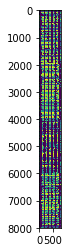

In [71]:
plt.imshow(train_image)

   The image above is train_image we're using matplotlib for showing image

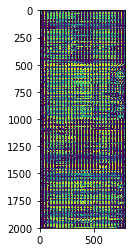

In [72]:
plt.imshow(test_image)

   The image above is test_image we're using matplotlib for showing the image

In [73]:
np.shape(train_image)

(8000, 784)

We've to reshape the train_image to 3D image.So we have to get it's dimensions

In [74]:
np.shape(train_label)

(8000,)

The height of the train_label must be equal to height of train_image, Otherwise we get Error: In this case they're equal

In [75]:
train_image = train_image.reshape(8000,28,28)

Now we've to transform our train_image into 3D. Why because in that case only we get each image in the train_image and to train each image individually.

In [76]:
test_image.shape

(2000, 784)

We getting shape of test_image for transforming it to 3D.

In [77]:
test_image = test_image.reshape(2000,28,28)

Now we've to transform our test_image into 3D for getting each image individually

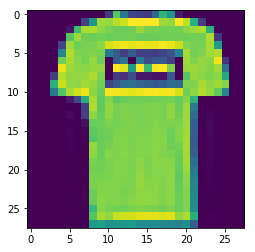

In [78]:
plt.imshow(train_image[0])

An image from our train_image

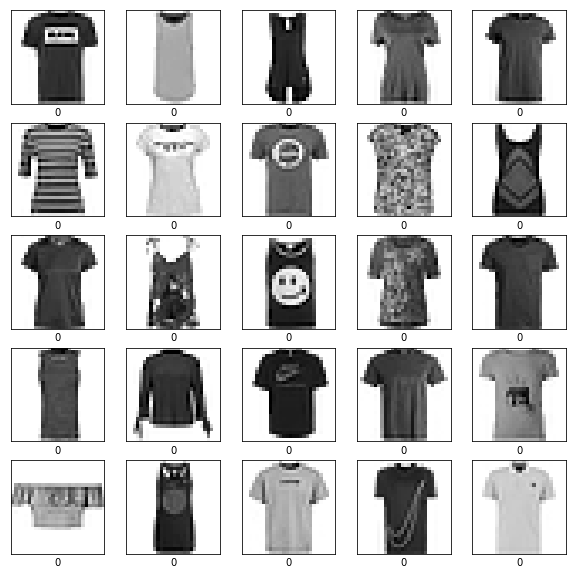

In [79]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

We are classifying first 25 images and their classes using train_label data

In [80]:
import tensorflow as tf
from tensorflow import keras

Here were importing tensorflow and keras.They very popular Deep Learning libraries in computer vision.I'm going to use them to train our training data more accurately and less loss

In [81]:
train_image = train_image / 255.0
test_image = test_image / 255.0

We scale these values between 0 to 1, for this we've to divide by 255. Otherwise we get values below 0.5 of accuracy and more than 10 of loss that is not good for our training and testing image.So we've to divide both test_image and train_image

In [82]:
train_image.shape,test_image.shape

((8000, 28, 28), (2000, 28, 28))

We're confirming that both images are same dimensional

In [83]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Here I'm building a model,each argument have it's own function.
1.keras.layers.Flatten-
    Flatten is flatten the input any Dimensional array to 1D and sends to first neural net.
2.Keras.layers.Dense(128,activation = tf.nn.softmax)-
    Whenever neural net get negative values in this case all the input data gives zero values relu will helps in this one.
3.keras.layers.Dense(10, activation=tf.nn.softmax)-
    which normalizes the logit scores as well as makes them easily differentiable!In order to convert the score matrix to probabilities, we use Softmax function,in dealing with multiple classes softmax fucntion helps in doing this.

In [84]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Optimizer — Helps in improving speed and performance of a trainig model.
loss - Tells us How accurate the model is training.
Metrics - Used to moniter the training and testing steps.

In [85]:
model.fit(train_image, train_label, epochs = 77)

Epoch 1/77
8000/8000 [==============================] - 1s 152us/sample - loss: 0.6332 - acc: 0.7540
Epoch 2/77
8000/8000 [==============================] - 1s 124us/sample - loss: 0.5171 - acc: 0.8024
Epoch 3/77
8000/8000 [==============================] - 1s 124us/sample - loss: 0.4811 - acc: 0.8106
Epoch 4/77
8000/8000 [==============================] - 1s 127us/sample - loss: 0.4434 - acc: 0.8284
Epoch 5/77
8000/8000 [==============================] - 1s 137us/sample - loss: 0.4251 - acc: 0.8326
Epoch 6/77
8000/8000 [==============================] - 1s 133us/sample - loss: 0.3987 - acc: 0.8415
Epoch 7/77
8000/8000 [==============================] - 1s 141us/sample - loss: 0.3879 - acc: 0.8469
Epoch 8/77
8000/8000 [==============================] - 1s 136us/sample - loss: 0.3698 - acc: 0.8543
Epoch 9/77
8000/8000 [==============================] - 1s 123us/sample - loss: 0.3597 - acc: 0.8597
Epoch 10/77
8000/8000 [==============================] - 1s 130us/sample - loss: 0.3426 - a

This is the trainig part of our train_image with train_label,the argument epochs is sending data to same network again and again.In this case epoch is 77 send data to same network 77 times

In [86]:
predictions = model.predict(test_image)

Here we are predicting our test_image data

0

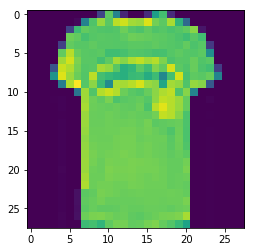

In [87]:
plt.imshow(test_image[0])
np.argmax(predictions[0])

Here the image shows that is the image of test_image data that belongs to class 0.
np.argmax() returns an indices of maximum element in the array

In [88]:
predicted_test = []
for i in range (2000):
    predicted_test.append(np.argmax(predictions[i]))

We are storing all the predicted image classes in a list

In [89]:
final_data = list(zip(list(range(0,2000)),predicted_test))

Here I'm zipping the image index values and their corresponding class values

In [91]:
final_data.insert(0,('image_index','class'))

So, our data has been stored in csv file we have to insert 'image_index' and 'class' as headers at index 0

In [92]:
import csv

For storing data in a csv file we should have to import csv module

In [93]:
with open('tupakulamallikarjuna.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(final_data)
f.close()

This is the final part storing data in csv file